In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image 
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD #Adadelta, Adagrad, Adam, Adamax, K, Nadam, RMSprop, SGD, TFOptimizer

Using TensorFlow backend.


In [3]:
df = pd.read_csv('../../data/raw/Udemy_Zero_to_deep_learning_Mosconi/user_visit_duration.csv')

In [4]:
df.columns

Index(['Time (min)', 'Buy'], dtype='object')

In [5]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


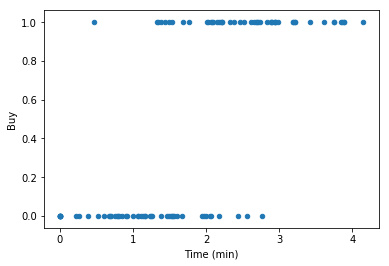

In [6]:
df.plot(kind='scatter', x='Time (min)', y='Buy')

In [7]:
model = Sequential()

In [8]:
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

In [9]:
model.compile(SGD(lr=0.5), loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [11]:
X = df['Time (min)']
y = df.Buy

In [12]:
model.fit(X, y , epochs=10)

Epoch 1/10
100/100 [==============================] - 2s 17ms/step - loss: 0.7182 - acc: 0.4800
Epoch 2/10
100/100 [==============================] - 0s 850us/step - loss: 0.6204 - acc: 0.6000
Epoch 3/10
100/100 [==============================] - 0s 1ms/step - loss: 0.5889 - acc: 0.7500
Epoch 4/10
100/100 [==============================] - 0s 294us/step - loss: 0.5523 - acc: 0.7400
Epoch 5/10
100/100 [==============================] - 0s 260us/step - loss: 0.5396 - acc: 0.7100
Epoch 6/10
100/100 [==============================] - 0s 187us/step - loss: 0.5200 - acc: 0.7700
Epoch 7/10
100/100 [==============================] - 0s 285us/step - loss: 0.5031 - acc: 0.8000
Epoch 8/10
100/100 [==============================] - 0s 695us/step - loss: 0.4868 - acc: 0.7900
Epoch 9/10
100/100 [==============================] - 0s 539us/step - loss: 0.4718 - acc: 0.8000
Epoch 10/10
100/100 [==============================] - 0s 208us/step - loss: 0.4762 - acc: 0.8100


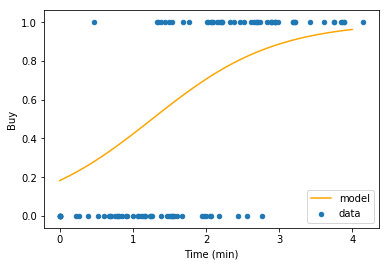

In [20]:
ax =  df.plot(kind='scatter', x = 'Time (min)', y='Buy')
temp = np.linspace(0,4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])

In [21]:
temp

array([0.        , 0.08163265, 0.16326531, 0.24489796, 0.32653061,
       0.40816327, 0.48979592, 0.57142857, 0.65306122, 0.73469388,
       0.81632653, 0.89795918, 0.97959184, 1.06122449, 1.14285714,
       1.2244898 , 1.30612245, 1.3877551 , 1.46938776, 1.55102041,
       1.63265306, 1.71428571, 1.79591837, 1.87755102, 1.95918367,
       2.04081633, 2.12244898, 2.20408163, 2.28571429, 2.36734694,
       2.44897959, 2.53061224, 2.6122449 , 2.69387755, 2.7755102 ,
       2.85714286, 2.93877551, 3.02040816, 3.10204082, 3.18367347,
       3.26530612, 3.34693878, 3.42857143, 3.51020408, 3.59183673,
       3.67346939, 3.75510204, 3.83673469, 3.91836735, 4.        ])

In [22]:
np.linspace(0,1, num=10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [23]:
temp_class = model.predict(temp) > 0.5

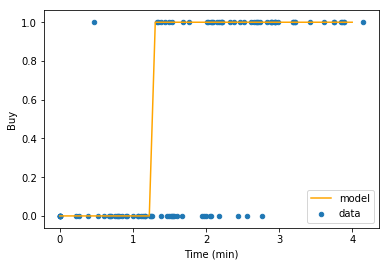

In [27]:
ax =  df.plot(kind='scatter', x = 'Time (min)', y='Buy')
temp = np.linspace(0,4, 50)
ax.plot(temp, temp_class, color='orange')
plt.legend(['model', 'data'])

In [28]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.5

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [30]:
accuracy_score(y, y_class_pred)

0.8

In [31]:
confusion_matrix(y, y_class_pred)

array([[31, 19],
       [ 1, 49]])

In [32]:
#Helper for confusion matrix
def pretty_confusion_matrix(y_true, y_pred, labels=['False', 'True']):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted ' + label for label in labels]
    df = pd.DataFrame(data=cm, index=labels, columns=pred_labels)
    return df

In [33]:
pretty_confusion_matrix(y, y_class_pred, ['Not buy', 'Buy'])

,Predicted Not buy,Predicted Buy
Not buy,31,19
Buy,1,49


In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [35]:
print('Precision score: \t{:0.3f}'.format(precision_score(y, y_class_pred)))
print('Recall score: \t\t{:0.3f}'.format(recall_score(y, y_class_pred)))
print('F1 score: \t\t{:0.3f}'.format(f1_score(y, y_class_pred)))

Precision score: 	0.721
Recall score: 		0.980
F1 score: 		0.831


In [36]:
print(classification_report(y, y_class_pred))

              precision    recall  f1-score   support

           0       0.97      0.62      0.76        50
           1       0.72      0.98      0.83        50

   micro avg       0.80      0.80      0.80       100
   macro avg       0.84      0.80      0.79       100
weighted avg       0.84      0.80      0.79       100



In [59]:
#END